# INTRODUÇÃO À ANÁLISES DE DADOS BIOGEOGRÁFICOS COM GEOPANDAS

---


###### ${por\ João\ Gabriel\ Nunes\ e\ Ubiratan\ Batista}$

#1. Preparação do ambiente

Para começar as nossas atividades, primeiro temos que instalar (ou carregar) alguns pacotes que serão usados ao longo do nosso curso.

In [1]:
#Usaremos o !pip install toda vez que formos instalar (ou carregar) um novo pacote de recursos
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade rtree
!pip install --upgrade geopandas

     |████████████████████████████████| 219 kB 5.0 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=a8e8def039371800f3b2e5c014ffb2b4a54bd3436376d80b4eee73462aff6d37
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp
     |████████████████████████████████| 994 kB 4.8 MB/s 
     |████████████████████████████████| 994 kB 4.9 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 15.4 MB/s 


In [2]:
#Pacotes baixados ou já disponibilizados pelo Colab são "chamados" usando o IMPORT
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#2. Importando os dados

Com o ambiente montado, ou seja, com todos os pacotes necessários já carregados podemos importar os dados. O dados biogeográficos que serão usados são da distribuição do mexilhão-dourado, retirados do GBIF. 

Usaremos um pandas dataframe para visualização da nossa planilha de dados.

In [3]:
#Importaremos o dado direto de url, usando o raw do github
#Definimos a primeira variável, o planilha com os dados
url = 'https://raw.githubusercontent.com/jgnunes/geopandas/main/data/0137414-200613084148143.csv'
distrib_df =  pd.read_csv(url, delimiter="\t")

In [4]:
#Analisamos os primeiros elementos da nossa planilha de dados
#Importante para os alunos terem noção dos dados que estão trabalhando
distrib_df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2988494639,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/55655383,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",Limnoperna fortunei,NaN,AR,NaN,Santa Fe,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,-31.664501,-60.756241,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-06T10:27:00,6.0,8.0,2020.0,5855350,5855350,HUMAN_OBSERVATION,iNaturalist,Observations,55655383,NaN,Leonardo Adrián LEIVA,2020-08-07T00:22:10,CC_BY_NC_4_0,Leonardo Adrián LEIVA,Leonardo Adrián LEIVA,NaN,NaN,2020-12-10T18:26:40.722Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,2984453018,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/64738914,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",Limnoperna fortunei,NaN,BR,NaN,NaN,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,-27.309596,-52.102021,61.0,NaN,NaN,NaN,NaN,NaN,2020-06-27T11:29:00,27.0,6.0,2020.0,5855350,5855350,HUMAN_OBSERVATION,iNaturalist,Observations,64738914,NaN,Frederico Acaz Sonntag,2020-11-12T17:48:31,CC_BY_NC_4_0,Frederico Acaz Sonntag,Frederico Acaz Sonntag,NaN,NaN,2020-12-10T18:28:10.764Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,2984354738,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/64499479,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",Limnoperna fortunei,NaN,AR,NaN,Buenos Aires,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,-34.860164,-57.876459,1524.0,NaN,NaN,NaN,NaN,NaN,2020-11-08T15:53:00,8.0,11.0,2020.0,5855350,5855350,HUMAN_OBSERVATION,iNaturalist,Observations,64499479,NaN,Juan Matías,2020-11-09T04:24:27,CC_BY_NC_4_0,Juan Matías,Juan Matías,NaN,NaN,2020-12-10T18:28:26.864Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,2898273170,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/62549860,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",Limnoperna fortunei,NaN,BR,NaN,São Paulo,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,-20.829037,-50.546071,417.0,NaN,NaN,NaN,NaN,NaN,2020-10-11T16:27:00,11.0,10.0,2020.0,5855350,5855350,HUMAN_OBSERVATION,iNaturalist,Observations,62549860,NaN,Rafael Rosa,2020-10-14T11:55:16,CC_BY_NC_4_0,Márcia Cristina Martins da Silva,Márcia Cristina Martins da Silva,NaN,NaN,2020-12-10T18:27:52.539Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...
4,2884531309,51c49096-dc31-4077-b35c-4510a8ee1ee8,3fae5b43-131d-11eb-a93b-06f21c000156,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",NaN,NaN,CN,"Poyang Lake [Poyang Hu], [point estimated 4.72...",Jiangxi,PRESENT,22.0,69e7f900-ed5b-11dd-ac7e-b8a03c50a862,28.840000,116.491997,805.0,NaN,NaN,NaN,NaN,NaN,2008-01-01T00:00:00,NaN,NaN,2008.0,5855350,5855350,PRESERVED_SPECIMEN,NCSM,NCSM-UNIO,113643,NaN,Arthur E Bogan/6May2019,NaN,CC0_1_0,Noth Carolina Museum of Natural Sciences,NaN,NaN,NaN,2020-11-26T18:29:08.796Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...


In [5]:
#Analisaremos os últimos elementos do nosso Data Frame
#Importante para confirmar a integridade do arquivo
distrib_df.tail()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
103,215781205,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna depressa Brandt & Temcharoen, 1971",Limnoperna depressa Brandt 1971,Brandt 1971,TH,"Mekong River, Ban Ke Leck",Ubon Ratchathani Province,PRESENT,NaN,f9b67ad0-9c9b-11d9-b9db-b8a03c50a862,16.033333,105.283333,NaN,NaN,NaN,NaN,0.61,NaN,NaN,NaN,NaN,NaN,6531540,5855350,PRESERVED_SPECIMEN,ANSP,Malacology,(A6539E),NaN,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:24.321Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
104,215781203,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna depressa Brandt & Temcharoen, 1971",Limnoperna depressa Brandt 1971,Brandt 1971,LA,"Shore of Island and Into Rapids, Mekong River,...",Sithandone Province,PRESENT,NaN,f9b67ad0-9c9b-11d9-b9db-b8a03c50a862,14.100000,105.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6531540,5855350,PRESERVED_SPECIMEN,ANSP,Malacology,340389 (A6513B),NaN,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:35.989Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...
105,215781202,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna depressa Brandt & Temcharoen, 1971",Limnoperna depressa Brandt 1971,Brandt 1971,LA,"In Rapids, at Center of River, to Shore Of Lar...",Sithandone Province,PRESENT,NaN,f9b67ad0-9c9b-11d9-b9db-b8a03c50a862,14.116667,105.866667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6531540,5855350,PRESERVED_SPECIMEN,ANSP,Malacology,340415 (A6523C),NaN,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:35.916Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
106,215781201,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna depressa Brandt & Temcharoen, 1971",Limnoperna depressa Brandt 1971,Brandt 1971,LA,Papaeng Water Falls,Sithandone Province,PRESENT,NaN,f9b67ad0-9c9b-11d9-b9db-b8a03c50a862,13.933333,105.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6531540,5855350,PRESERVED_SPECIMEN,ANSP,Malacology,339995 (A6207),NaN,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:35.895Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
107,215781200,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna depressa Brandt & Temcharoen, 1971",Limnoperna depressa Brandt 1971,Brandt 1971,LA,"Islands and Rapids Just at Ban Na, Mekong Rive...",Sithandone Province,PRESENT,NaN,f9b67ad0-9c9b-11d9-b9db-b8a03c50a862,14.100000,105.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6531540,5855350,PRESERVED_SPECIMEN,ANSP,Malacology,340024 (A6215),NaN,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:35.877Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...


#3. Explorando o Dataframe

De posse dos nossos dados, podemos explorar as informações contidas como por exemplo, quantas colunas estão presentes e o conteúdo de algumas delas.
Isso é importante para guiar a análise àqueles dados que serão mais promissores ou melhor atendem ao nosso objetivo.

,  
E investigamos o conteúdo das colunas que parecem ser as nossas colunas-alvos mais promissoras - especificamente, de suas primeiras vinte linhas

In [6]:
#Listaremos todas as colunas da tabela do GBIF para inspeção
distrib_df.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')

In [7]:
#Depois de analisar todas as colunas, focaremos no conteúdo de colunas de interesse
#Analisaremos os 20 primeiros elemetos das colunas de coordenada geográfica, espécie e país
distrib_df[['decimalLatitude', 'decimalLongitude', 'species', 'countryCode']].head(20)

,decimalLatitude,decimalLongitude,species,countryCode
0,-31.664501,-60.756241,Limnoperna fortunei,AR
1,-27.309596,-52.102021,Limnoperna fortunei,BR
2,-34.860164,-57.876459,Limnoperna fortunei,AR
3,-20.829037,-50.546071,Limnoperna fortunei,BR
4,28.840000,116.491997,Limnoperna fortunei,CN
5,-31.659614,-60.756937,Limnoperna fortunei,AR
6,-31.666302,-60.754477,Limnoperna fortunei,AR
7,-33.597518,-59.808151,Limnoperna fortunei,AR
8,-32.910353,-60.674343,Limnoperna fortunei,AR
9,-32.210337,-64.471828,Limnoperna fortunei,AR


In [8]:
#Analisaremos os 20 últimos elemetos das colunas de coordenada geográfica, espécie e país
#Ainda na ideia de conferir e interagir com o dado
distrib_df[['decimalLatitude', 'decimalLongitude', 'species', 'countryCode']].tail(20)

,decimalLatitude,decimalLongitude,species,countryCode
88,16.050000,105.216667,Limnoperna fortunei,TH
89,14.533333,103.783333,Limnoperna fortunei,TH
90,16.050000,105.216667,Limnoperna fortunei,TH
91,16.050000,105.216667,Limnoperna fortunei,TH
92,16.050000,105.216667,Limnoperna fortunei,TH
93,14.150000,105.816667,Limnoperna fortunei,LA
94,14.108333,105.858333,Limnoperna fortunei,LA
95,16.050000,105.216667,Limnoperna fortunei,TH
96,15.383333,105.500000,Limnoperna fortunei,TH
97,15.233333,105.250000,Limnoperna fortunei,TH


#4. Mapa

Nesta seção iremos partir para o nosso objetivo final, a construção dos mapas de distribuição. Tendo os dados importados e triados, podemos usá-los para plotar pontos em diferentes "shapes" dos mapas.

##4.1 Montando o Drive

Precisamos adicionar alguns arquivos importantes para a construção dos mapas. Estes arquivos estão em uma pasta chamada `Dados Python Workshop`, que foi compartilhada pelos instrutores. Estes arquivos devem ser adicionados à sua pasta `Meu Drive` (`My Drive`). 

A primeira etapa é montar o seu `Meu Drive` dentro do sistema de arquivos deste caderno, para que você consiga acessar, a partir daqui, quaisquer arquivos armazenados no seu Drive. 

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Agora vá para a página web do seu google drive (drive.google.com), e clique em  `Compartilhados comigo`. Você deve ver uma pasta nomeada `Dados Python Workshop`. Clique com o botão direito sobre a pasta, e então clique em `Adicionar atalho ao Google Drive`. 

![figura1.png](https://github.com/jgnunes/geopandas/blob/main/images/figura1.png?raw=true)

Com a opção `Meu Drive` selecionada, clique em `Adicionar Atalho`. Desta forma você estará criando um atalho para a pasta `Dados Python Workshop`, que contém arquivos que iremos usar neste caderno, dentro de seu `Meu Drive`.

![figura2.png](https://github.com/jgnunes/geopandas/blob/main/images/figura2.png?raw=true)

Para checar se o procedimento funcionou, clique no ícone de uma pasta na barra lateral esquerda deste caderno (`Files`). Então clique na pasta `drive`, e então em `MyDrive`. Você deve ver que a pasta `Dados Python Workshop` foi adicionada como uma subpasta de `MyDrive`.

![figura3.png](https://github.com/jgnunes/geopandas/blob/main/images/figura3.png?raw=true)

Se você chegou até este ponto, ótimo! Se não, peça ajuda.



Agora que você já adicionou a pasta com nossos dados ao seu próprio Drive, vamos importar um de nossos arquivos de interesse. Este arquivo é o `World_Countries-shp.zip`, que contém todas as informações necessárias para desenhar um mapa mundial. Este arquivo será lido com a função `geopandas.read_file`, o que significa que o objeto gerado, `map_df`, será um GeoPandas DataFrame (GPD). 

GPDs são objetos virtualmente idênticos aos tradicionais Pandas Dataframes, com a diferença de que contém uma coluna obrigatória chamada *geometry*. A coluna *geometry* contém todas as informações para desenhar um objeto espacial no mapa, seja esse objeto um simples ponto, ou um polígono complexo representando, por exemplo, as fronteiras de um país (como é o caso de `map_df`).  

##4.2 Coletando os dados do shape

In [10]:
#Criamos o nosso Geopandas DF para shape mapa-mundi extraindo o arquivo zip "World Countries shp"
map_df = gpd.read_file('zip:///content/drive/MyDrive/Dados Python Workshop/World_Countries-shp.zip')

In [11]:
#Visualizaremos como o Frame das informações do Mapa está distribuido
map_df

,FID,COUNTRY,ISO_CC,CONTINENT,LAND_TYPE,LAND_RANK,COUNTRYAFF,Shape__Are,Shape__Len,geometry
0,1,Antarctica,AQ,Antarctica,Large island,4,Antarctica,1.182988e+12,1.813174e+07,"MULTIPOLYGON (((-160.32489 -79.89787, -160.527..."
1,2,Antarctica,AQ,Antarctica,Medium island,3,Antarctica,3.694553e+11,1.945439e+07,"MULTIPOLYGON (((165.98732 -78.16456, 166.00089..."
2,3,Antarctica,AQ,Antarctica,Primary land,5,Antarctica,6.970359e+14,2.072300e+08,"POLYGON ((-179.99986 -89.00000, -179.99920 -84..."
3,4,Antarctica,AQ,Antarctica,Small island,2,Antarctica,6.396456e+10,1.420865e+07,"MULTIPOLYGON (((-149.94911 -77.51043, -150.032..."
4,5,Argentina,AR,South America,Medium island,3,Argentina,4.047231e+09,9.825746e+05,"MULTIPOLYGON (((-64.31110 -54.73605, -64.30267..."
...,...,...,...,...,...,...,...,...,...,...
650,651,Iceland,IS,Europe,Small island,2,Iceland,5.793328e+08,1.196809e+06,"MULTIPOLYGON (((-20.59745 63.29679, -20.60088 ..."
651,652,Iceland,IS,Europe,Very small island,1,Iceland,2.050640e+08,2.038826e+06,"MULTIPOLYGON (((-20.31755 63.38716, -20.32206 ..."
652,653,Ireland,IE,Europe,Primary land,5,Ireland,1.942732e+11,9.889288e+06,"POLYGON ((-7.36671 55.38294, -7.36607 55.38251..."
653,654,Ireland,IE,Europe,Small island,2,Ireland,9.744889e+08,1.534425e+06,"MULTIPOLYGON (((-9.46527 51.45360, -9.46495 51..."


Agora criamos um GeoPandas DataFrame (`distrib_points`) a partir do DataFrame de distribuição do GBIF (`distrib_df`), levando em consideração as informação do Geopandas DF do mapa mundi (`map_df`). A coluna *geometry* contém informações para desenhar pontos (Point), os quais representam locais de ocorrência de mexilhão-dourado no mapa. 

In [12]:
#Construiremos o Geo Dataframe de distribuição do mexilhão
distrib_global = gpd.GeoDataFrame(
    distrib_df, geometry=gpd.points_from_xy(
        distrib_df.decimalLongitude, distrib_df.decimalLatitude), crs = map_df.crs)

##4.3 Montando o Mapa

Com as informações contidas como Geo Data Frame, utilizaremos o `map_df` para desenhar um mapa mundial. Após desenhar o mapa, utilizaremos o Geo Data Frame que criamos, o `distrib_points` para plotar os pontos de registro de ocorrência de mexilhão-dourado.

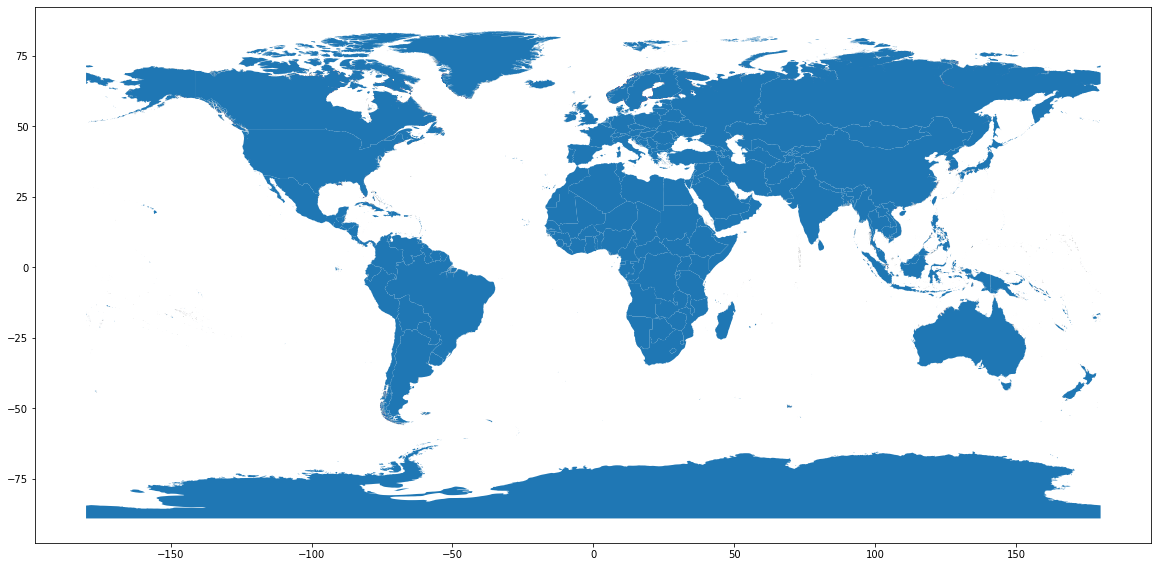

In [ ]:
#Primeiramente criamos o sub-plot com o matplotlib
fig, ax = plt.subplots(1, 1, figsize=(20,10))

#Depois, definimos o plot do mapa mundial, ao qual os pontos de ocorrência do mexilhão-dourado serão sobrepostos
base = map_df.plot(ax=ax)

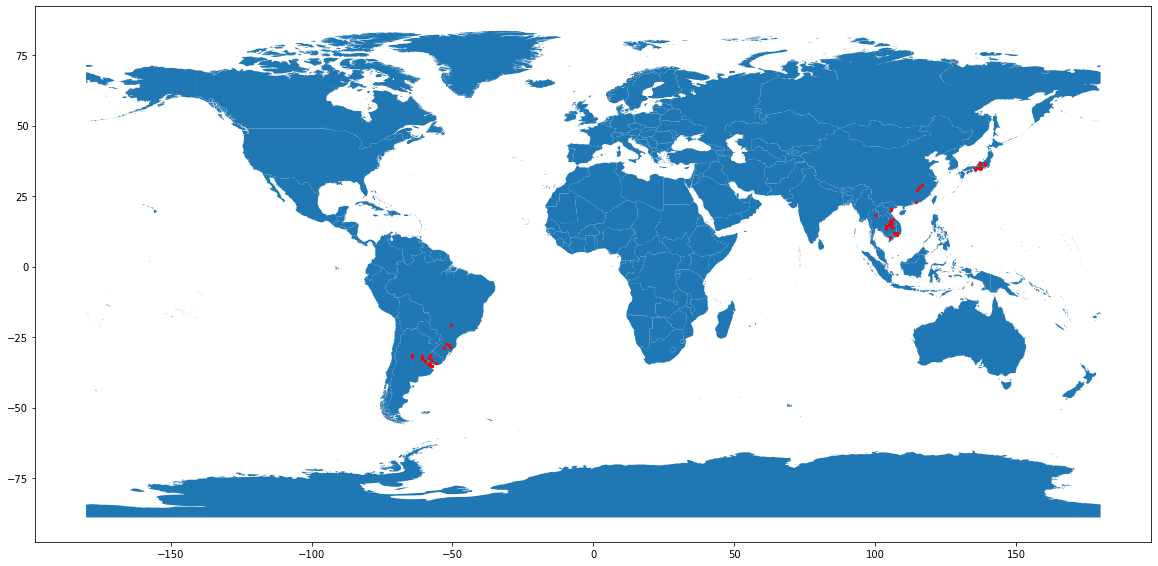

In [ ]:
#Como a base do mapa pronta, vamos então plotar os pontos de distribuição de ocorrência do Mexilhão Dourado
fig, ax = plt.subplots(1, 1, figsize=(20,10))
base = map_df.plot(ax=ax)

distrib_global.plot(ax=base, marker='o', color='red', markersize=5, legend=True)


Text(147.875, 0.5, 'Latitude')

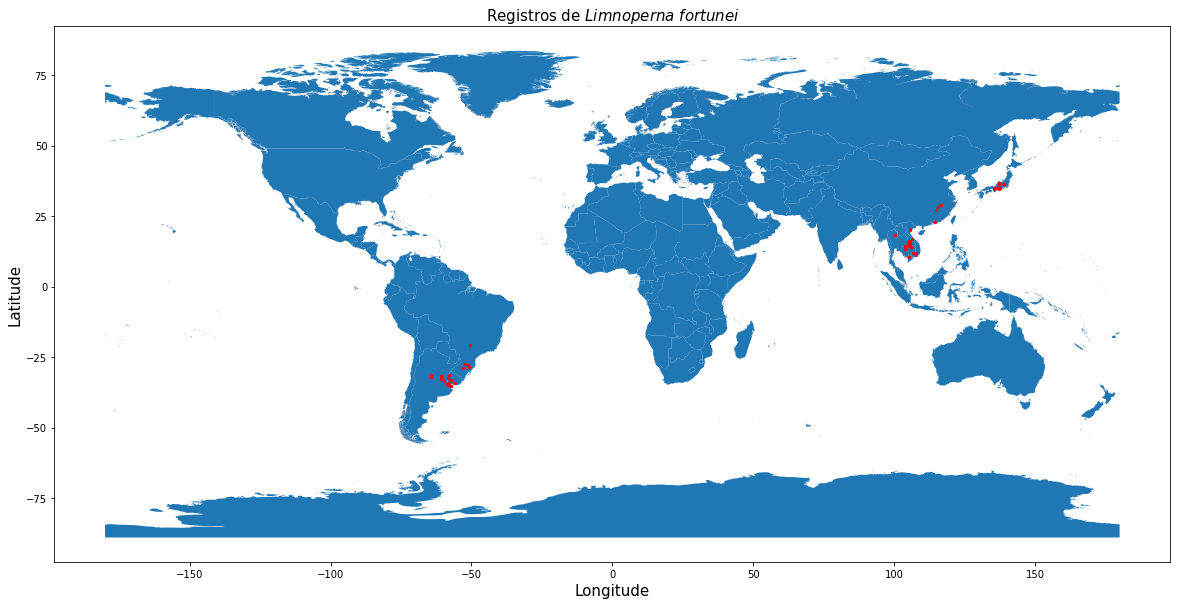

In [ ]:
#Podemos adicionar as informações gráficas, como titulo da fig e eixos.
fig, ax = plt.subplots(1, 1, figsize=(20,10))
base = map_df.plot(ax=ax)
distrib_global.plot(ax=base, marker='o', color='red', markersize=5, legend=True)

ax.set_title("Registros de ${Limnoperna\ fortunei}$", fontdict={'fontsize': 15, 'fontweight': 'medium'})

plt.xlabel("Longitude", fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.ylabel("Latitude", fontdict={'fontsize': 15, 'fontweight': 'medium'})

##4.4 Trabalhando o Mapa

Agora podemos filtrar apenas as ocorrências de mexilhão-dourado que sejam da América do Sul, nossa região de maior interesse. 

In [13]:
#Como no exemplo anterior, criaremos um Geopandas DF para o shape do Mapa.
#Selecionaremos apenas ocorrências do mapa mundial pertencentes à América do Sul
map_df_america = map_df[map_df['CONTINENT'] == 'South America']

# selecionar apenas ocorrências que sejam parte do mapa de ocorrência do mexilhão-dourado 
# e da seção da América do Sul do mapa mundial
distrib_america = gpd.overlay(distrib_global, map_df_america, how='intersection')

Tendo estes dois Geopandas DataFrame (`map_df_america` e `distrib_america`) podemos plotar um gráfico de distribuição específico para a América do Sul.

Text(0.5, 1.0, 'Limnoperna fortunei na América do Sul')

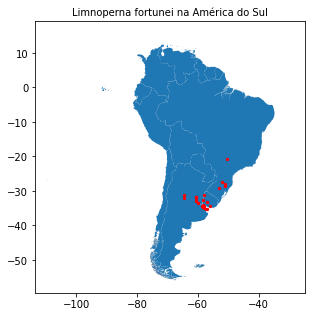

In [14]:
#Preparamos a base da da figura com os subplots do matplotlib
fig, ax = plt.subplots(1, 1, figsize=(10,5))

# iniciar mapa de background com países da América do Sul
base_america = map_df_america.plot(ax=ax)

# plotar pontos de ocorrência do mexilhão-dourado utilizando como background o mapa da América do Sul
distrib_america.plot(ax=base_america, marker='o', color='red', markersize=5)

ax.set_title("Limnoperna fortunei na América do Sul", fontdict={'fontsize': 10, 'fontweight': 'medium'})


#5. Mapa Coroplético de Distribuição

Vimos que é possível apontar no mapa os pontos de distribuição da espécie. No entanto, quantos registros de mexilhão-dourado foram registrados em cada país de acordo com o GBIF?

Nesta seção construiremos um gráfico coroplético que mostra esta relação.

## 5.1 Inspecionando o Dado

In [15]:
#Utilizando o Geo DataFrame Global de distribuição dos mexilhões
#Avaliaremos o n de individuos amostrados para cada país
distrib_global['countryCode'].value_counts()

AR    28
JP    27
TH    20
LA    13
VN     7
BR     5
CN     4
UY     3
KH     1
Name: countryCode, dtype: int64

A partir de agora vamos trabalhar para construir um mapa onde cada país seja colorido de acordo com o número de registros de mexilhão-dourado.
Para isso, iremos criar uma coluna adicional em `distrib_global` chamada `countryOccurrences`, e que irá conter o número de registrados de mexilhão-dourado em cada país. 

In [16]:
#Mostrando a função do groupby
#Lembrar os alunos que se não criar a variavel a informação será perdida
distrib_global.groupby(['countryCode'])['countryCode'].transform('count')

0      28
1       5
2      28
3       5
4       4
       ..
103    20
104    13
105    13
106    13
107    13
Name: countryCode, Length: 108, dtype: int64

## 5.2 Concatenando Dados de Interesse

In [ ]:
#Agora criaremos a variável com a nova coluna
#Apresentando a nova coluna no Geo DataFrame de distribuição

distrib_global['countryOccurrences'] = distrib_global.groupby(['countryCode'])['countryCode'].transform('count')
distrib_global.head()


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,geometry,countryOccurrences
0,2988494639,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/55655383,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",Limnoperna fortunei,NaN,AR,NaN,Santa Fe,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,-31.664501,-60.756241,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-06T10:27:00,6.0,8.0,2020.0,5855350,5855350,HUMAN_OBSERVATION,iNaturalist,Observations,55655383,NaN,Leonardo Adrián LEIVA,2020-08-07T00:22:10,CC_BY_NC_4_0,Leonardo Adrián LEIVA,Leonardo Adrián LEIVA,NaN,NaN,2020-12-10T18:26:40.722Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,POINT (-60.75624 -31.66450),28
1,2984453018,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/64738914,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",Limnoperna fortunei,NaN,BR,NaN,NaN,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,-27.309596,-52.102021,61.0,NaN,NaN,NaN,NaN,NaN,2020-06-27T11:29:00,27.0,6.0,2020.0,5855350,5855350,HUMAN_OBSERVATION,iNaturalist,Observations,64738914,NaN,Frederico Acaz Sonntag,2020-11-12T17:48:31,CC_BY_NC_4_0,Frederico Acaz Sonntag,Frederico Acaz Sonntag,NaN,NaN,2020-12-10T18:28:10.764Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,POINT (-52.10202 -27.30960),5
2,2984354738,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/64499479,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",Limnoperna fortunei,NaN,AR,NaN,Buenos Aires,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,-34.860164,-57.876459,1524.0,NaN,NaN,NaN,NaN,NaN,2020-11-08T15:53:00,8.0,11.0,2020.0,5855350,5855350,HUMAN_OBSERVATION,iNaturalist,Observations,64499479,NaN,Juan Matías,2020-11-09T04:24:27,CC_BY_NC_4_0,Juan Matías,Juan Matías,NaN,NaN,2020-12-10T18:28:26.864Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,POINT (-57.87646 -34.86016),28
3,2898273170,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/62549860,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",Limnoperna fortunei,NaN,BR,NaN,São Paulo,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,-20.829037,-50.546071,417.0,NaN,NaN,NaN,NaN,NaN,2020-10-11T16:27:00,11.0,10.0,2020.0,5855350,5855350,HUMAN_OBSERVATION,iNaturalist,Observations,62549860,NaN,Rafael Rosa,2020-10-14T11:55:16,CC_BY_NC_4_0,Márcia Cristina Martins da Silva,Márcia Cristina Martins da Silva,NaN,NaN,2020-12-10T18:27:52.539Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...,POINT (-50.54607 -20.82904),5
4,2884531309,51c49096-dc31-4077-b35c-4510a8ee1ee8,3fae5b43-131d-11eb-a93b-06f21c000156,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,NaN,SPECIES,"Limnoperna fortunei (Dunker, 1857)",NaN,NaN,CN,"Poyang Lake [Poyang Hu], [point estimated 4.72...",Jiangxi,PRESENT,22.0,69e7f900-ed5b-11dd-ac7e-b8a03c50a862,28.840000,116.491997,805.0,NaN,NaN,NaN,NaN,NaN,2008-01-01T00:00:00,NaN,NaN,2008.0,5855350,5855350,PRESERVED_SPECIMEN,NCSM,NCSM-UNIO,113643,NaN,Arthur E Bogan/6May2019,NaN,CC0_1_0,Noth Carolina Museum of Natural Sciences,NaN,NaN,NaN,2020-11-26T18:2

Veja que agora cada linha de ocorrência do GBIF tem o número de registros do mexilhão-dourado para o país associado:

In [ ]:
#Avaliando algumas colunas de interesse como a do numero de ocorrencias e a de pais
distrib_global[['gbifID', 'countryCode', 'countryOccurrences']]

,gbifID,countryCode,countryOccurrences
0,2988494639,AR,28
1,2984453018,BR,5
2,2984354738,AR,28
3,2898273170,BR,5
4,2884531309,CN,4
...,...,...,...
103,215781205,TH,20
104,215781203,LA,13
105,215781202,LA,13
106,215781201,LA,13


Repare que `distrib_global` representa de forma redundante a informação do número de ocorrências por país. E que as únicas informações que nos interessam são o país e o número de ocorrências associados. Vamos criar um novo DataFrame que contém apenas as colunas que interessam e não contém informação duplicada. 

In [ ]:
#Construindo um DataFrame de distribuições de mexilhão-dourado por país
distrib_countries = distrib_global[['countryCode', 'countryOccurrences']].drop_duplicates()
distrib_countries

,countryCode,countryOccurrences
0,AR,28
1,BR,5
4,CN,4
11,UY,3
13,KH,1
19,VN,7
33,JP,27
61,TH,20
76,LA,13


Veja que o novo DataFrame criado contém apenas as informações que nos interessam, ou seja, o número de ocorrências de mexilhão-dourado por país:

Agora iremos mesclar `map_df` e `distrib_countries` para adicionar a coluna `countryOccurrences` de `distrib_countries` a `map_df`:

In [ ]:
occurrences_df = pd.merge(map_df, distrib_countries, how="left", left_on=["ISO_CC"], right_on=["countryCode"])
occurrences_df.head()

,FID,COUNTRY,ISO_CC,CONTINENT,LAND_TYPE,LAND_RANK,COUNTRYAFF,Shape__Are,Shape__Len,geometry,countryCode,countryOccurrences
0,1,Antarctica,AQ,Antarctica,Large island,4,Antarctica,1.182988e+12,1.813174e+07,"MULTIPOLYGON (((-160.32489 -79.89787, -160.527...",NaN,NaN
1,2,Antarctica,AQ,Antarctica,Medium island,3,Antarctica,3.694553e+11,1.945439e+07,"MULTIPOLYGON (((165.98732 -78.16456, 166.00089...",NaN,NaN
2,3,Antarctica,AQ,Antarctica,Primary land,5,Antarctica,6.970359e+14,2.072300e+08,"POLYGON ((-179.99986 -89.00000, -179.99920 -84...",NaN,NaN
3,4,Antarctica,AQ,Antarctica,Small island,2,Antarctica,6.396456e+10,1.420865e+07,"MULTIPOLYGON (((-149.94911 -77.51043, -150.032...",NaN,NaN
4,5,Argentina,AR,South America,Medium island,3,Argentina,4.047231e+09,9.825746e+05,"MULTIPOLYGON (((-64.31110 -54.73605, -64.30267...",AR,28.0


Agora inspecionemos as instâncias do Brasil no nosso novo DataFrame e observemos que a coluna com o número de ocorrências de mexilhão-dourado no país foi adicionada (última coluna)

In [ ]:
occurrences_df[occurrences_df['COUNTRY'] == "Brazil"]

,FID,COUNTRY,ISO_CC,CONTINENT,LAND_TYPE,LAND_RANK,COUNTRYAFF,Shape__Are,Shape__Len,geometry,countryCode,countryOccurrences
112,113,Brazil,BR,South America,Small island,2,Brazil,1.924801e+10,1.465677e+07,"MULTIPOLYGON (((-52.06420 -32.04804, -52.06579...",BR,5.0
113,114,Brazil,BR,South America,Very small island,1,Brazil,2.568649e+08,2.675408e+06,"MULTIPOLYGON (((-52.12869 -32.02380, -52.12881...",BR,5.0
136,137,Brazil,BR,South America,Medium island,3,Brazil,1.117832e+10,1.835569e+06,"MULTIPOLYGON (((-50.47484 -0.74102, -50.47005 ...",BR,5.0
137,138,Brazil,BR,South America,Primary land,5,Brazil,8.987842e+12,4.604796e+07,"MULTIPOLYGON (((-49.80937 -1.81828, -49.82114 ...",BR,5.0


## 5.3 Criando o Frame para o Mapa

Agora iremos transformar nosso Pandas DataFrame `occurrences_df` em um GeoPandas DataFrame, para posterior construção do mapa.

In [17]:
occurrences_gpd = gpd.GeoDataFrame(occurrences_df, geometry='geometry')

#Exploramos o que quer dizer esta alteração com o .head()
occurrences_gpd.head()

NameError: ignored

## 5.4 Construindo o Mapa 

Finalmente, vamos construir um mapa utilizando o número de registros de mexilhão-dourado em cada país. Os países serão representados por cor de acordo a densidade de individuos amostrados. Aqueles países onde não houve registro da espécie seão coloridos em cinza claro. 

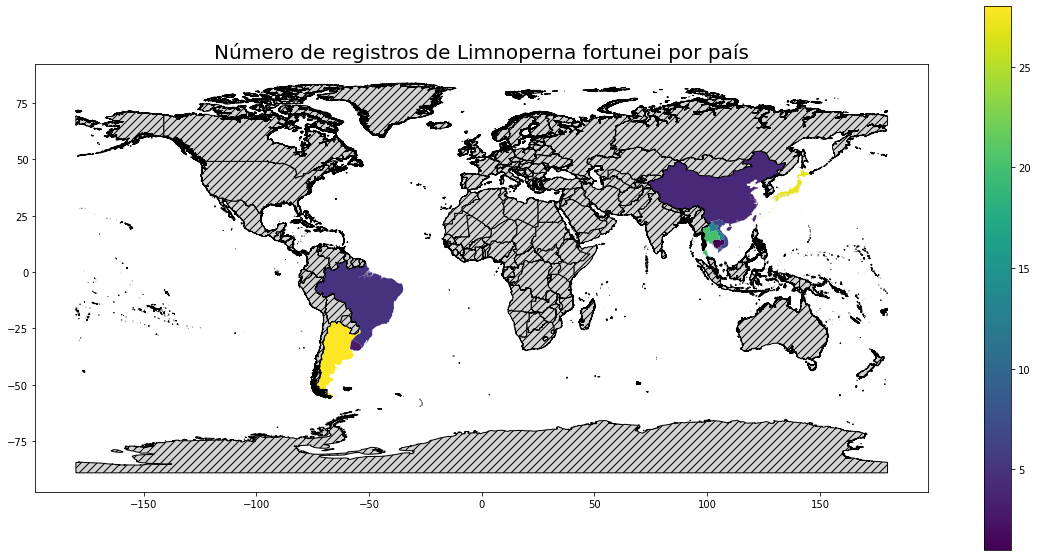

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

ax.set_title("Número de registros de Limnoperna fortunei por país", fontdict={'fontsize': 20, 'fontweight': 'medium'})

occurrences_gpd.plot(ax=ax, column='countryOccurrences', legend=True,
                    missing_kwds={
                        "color": "lightgrey",
                        "edgecolor": "black",
                        "hatch": "///",
                        "label": "Missing values",
                    })